In [1]:
import pandas as pd
from df_utils import create_df
from plot_utils import plot_distance_to_target, plot_time_inside_target, plot_deviation_count
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cmap = plt.get_cmap('plasma') 
all_variants = ["Bonus + Effort Model", "Bonus", "Distance + Bonus", "Distance"]
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / 5) for key, v in zip(all_variants, values)}

In [3]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
data_df_1, number_of_episodes = create_df(["no_bonus", "hit_bonus"], ["zero_effort"], ["dist"], "../../simulators/", run_nr=1, task="tracking")
data_df_2, number_of_episodes = create_df(["hit_bonus_8"], effort_models, ["no"], "../../simulators/", run_nr=1, task="tracking")
all_combined_df = pd.concat([data_df_1, data_df_2])

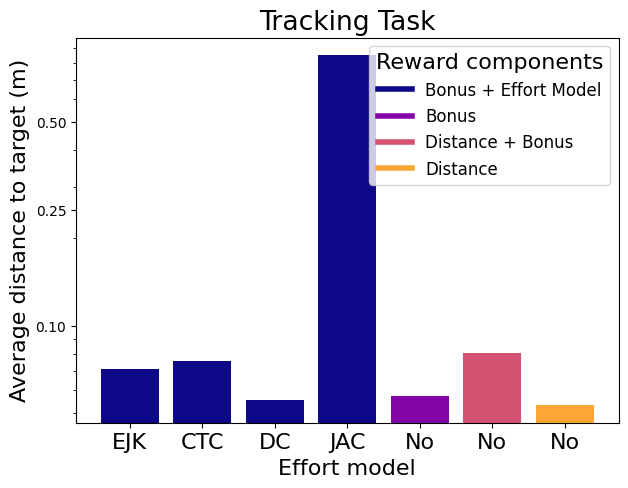

In [4]:
plot_distance_to_target('tracking','Reward components',"distance_tracking", colors, all_combined_df)

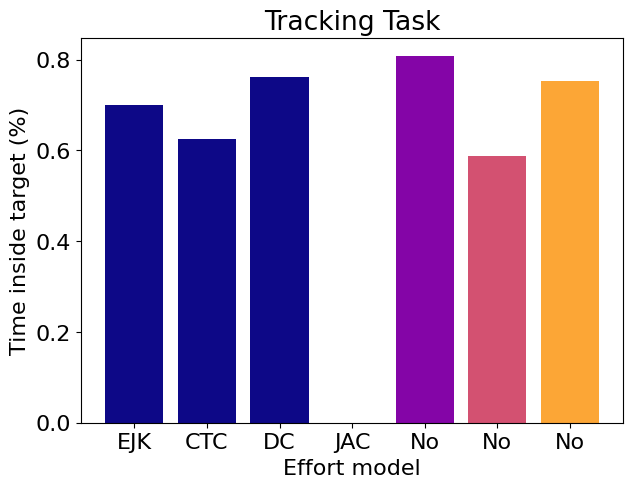

In [5]:
plot_time_inside_target('tracking','time_tracking', colors, all_combined_df)

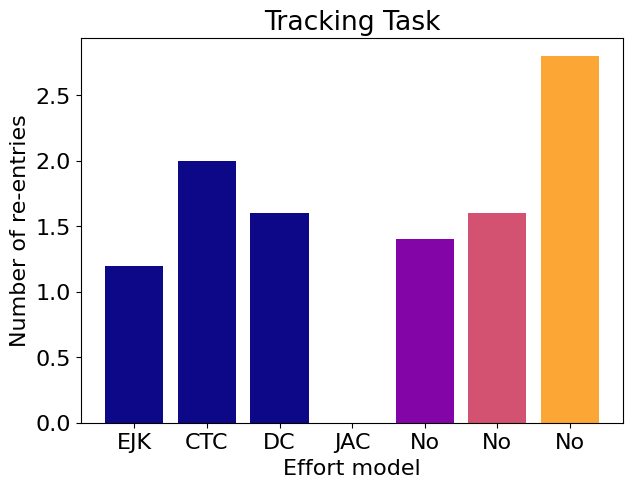

In [6]:
plot_deviation_count('Tracking','deviation_count_tracking', colors, all_combined_df)